# Bienenstock-Cooper-Munro Model

*by Younginn Park*

BCM model - a model for synaptic plasticity

---
Definitions:
- $f$ - firing rate of the presynaptic neuron (here, simplified: fixed)
- $r$ - firing rate of the postsynaptic neuron
- $w$ - synaptic weights
- $\theta$ - sliding threshold
- $\tau_w, \tau_\theta, \tau_r$ - time constants for weights, sliding threshold and firing rate of the postsynaptic neuron, respectively
- Constants:
    - $\epsilon$ - time constant of uniform decay (small value)
    - $\lambda$ - scaling constant for the change of weights (learning rate)
    - $\alpha$ - sensitivity constant (how sliding threshold is sensitive to firing rate)
    - $\beta$ - scaling constant for the efficacy of the presynaptic neuron on the postsynaptic neuron

$$
\begin{cases}
\tau_w \frac{dw}{dt} = \lambda f r (r - \theta) - \epsilon w \\
\tau_\theta \frac{d\theta}{dt} = - \theta + \alpha r^2 \\
\tau_r \frac{dr}{dt} = - r + \beta w f
\end{cases}
$$

Task:
- create a simulation function for exemplary initial values (input for that function) and make a triple plot (three square-ish graphs in one row) for the variables through time


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bcm_simulation(
    t_max: float,
    dt: float,
    f: float,
    initial_w: float,
    initial_theta: float,
    initial_r: float,
    tau_w: float,
    tau_theta: float,
    tau_r: float,
    epsilon: float,
    lambda_: float,
    alpha: float,
    beta: float
):
    # Time array
    time_steps = int(t_max / dt)
    times = np.linspace(0, t_max, time_steps)

    # Initialize arrays for w, theta, and r
    w = np.zeros(time_steps)
    theta = np.zeros(time_steps)
    r = np.zeros(time_steps)

    # Set initial values
    w[0] = initial_w
    theta[0] = initial_theta
    r[0] = initial_r

    for t in range(1, time_steps):
        # Compute derivatives
        dw_dt = (lambda_ * f * r[t - 1] * (r[t - 1] - theta[t - 1]) - epsilon * w[t - 1]) / tau_w
        dtheta_dt = (-theta[t - 1] + alpha * r[t - 1]**2) / tau_theta
        dr_dt = (-r[t - 1] + beta * w[t - 1] * f) / tau_r

        # Update values
        w[t] = w[t - 1] + dw_dt * dt
        theta[t] = theta[t - 1] + dtheta_dt * dt
        r[t] = r[t - 1] + dr_dt * dt

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot synaptic weights over time
    axs[0].plot(times, w, color='blue')
    axs[0].set_title("Synaptic Weights (w)")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("w")

    # Plot sliding threshold over time
    axs[1].plot(times, theta, color='orange')
    axs[1].set_title("Sliding Threshold (θ)")
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("θ")

    # Plot postsynaptic firing rate over time
    axs[2].plot(times, r, color='green')
    axs[2].set_title("Postsynaptic Firing Rate (r)")
    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("r")

    plt.tight_layout()
    plt.show()

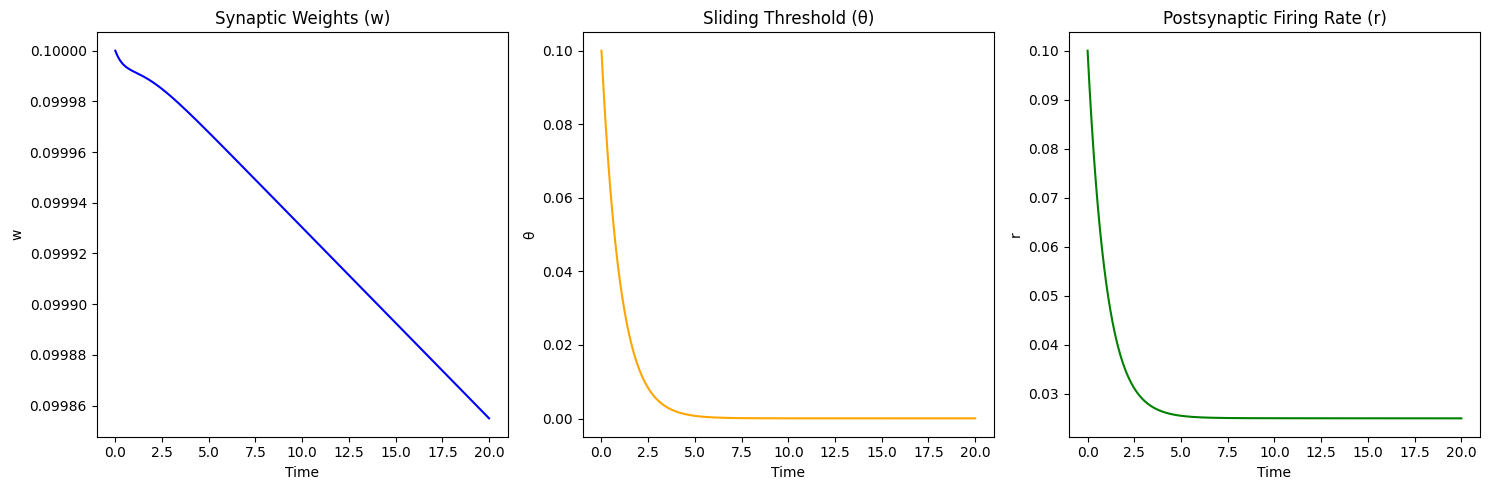

In [4]:
bcm_simulation(
    t_max=20.0,
    dt=0.01,             # Time step
    f=1.0,               # Firing rate of the presynaptic neuron
    initial_w=0.1,       # Initial synaptic weight
    initial_theta=0.1,   # Initial sliding threshold
    initial_r=0.1,       # Initial firing rate of the postsynaptic neuron
    tau_w=5.0,           # Time constant for the synaptic weight
    tau_theta=1.0,       # Time constant for the sliding threshold
    tau_r=1.0,           # Time constant for the firing rate of the postsynaptic neuron
    epsilon=0.001,       # Time constant for uniform weight decay
    lambda_=0.1,         # Learning rate
    alpha=0.1,           # Sensitivity constant
    beta=0.25            # Scaling constant for presynaptic firing rate
)


## Time scale separation for postsynaptic firing rate

$$\tau_r \ll \tau_\theta, \tau_w$$

Extend the time frame ($\text{time} \gg \tau_r$) and assume fixed firing rate for the postsynaptic neuron ($r$), which gives the formula as $r = \beta w f$. Which changes the system of equations to:

$$
\begin{cases}
\tau_w \frac{dw}{dt} = \lambda \beta w f^2 (\beta w f - \theta) - \epsilon w \\
\tau_\theta \frac{d\theta}{dt} = - \theta + \alpha (\beta w f)^2
\end{cases}
$$



Task:
- plot the phase portrait of the synaptic weight ($w$) and the sliding threshold ($\theta$), for a given meshgrid of initial values


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def bcm_phase_portrait(
    w_min: float, w_max: float, theta_min: float, theta_max: float,
    f: float, beta: float, lambda_: float, alpha: float, epsilon: float,
    tau_w: float, tau_theta: float, grid_size: int = 20
) -> None:
    # Create a meshgrid for w and theta
    w_values = np.linspace(w_min, w_max, grid_size)
    theta_values = np.linspace(theta_min, theta_max, grid_size)
    W, Theta = np.meshgrid(w_values, theta_values)

    # Compute dw/dt and dtheta/dt over the meshgrid
    dW_dt = (lambda_ * beta * W * f**2 * (beta * W * f - Theta) - epsilon * W) / tau_w
    dTheta_dt = (-Theta + alpha * (beta * W * f)**2) / tau_theta

    # Plotting the phase portrait
    fig, ax = plt.subplots(figsize=(5, 5))

    # Quiver or Streamplot plot for the vector field
    # ax.quiver(W, Theta, dW_dt, dTheta_dt)
    ax.streamplot(W, Theta, dW_dt, dTheta_dt)

    fp1 = (0, 0)
    fp2 = (epsilon / (alpha * beta**2 * f**3), (alpha * epsilon **2) / (lambda_ * beta**2 * f**4))
    fp3 = (1 / (alpha * beta * f), 1 / alpha)

    ax.plot(fp1[0], fp1[1], color='r', marker='o', label=f'Fixed point 1 = ({fp1[0]}, {fp1[1]})')
    ax.plot(fp2[0], fp2[1], color='g', marker='o', label=f'Fixed point 2 = ({fp2[0]:.3f}, {fp2[1]:.6f})')
    ax.plot(fp3[0], fp3[1], color='b', marker='o', label=f'Fixed point 3 = ({fp3[0]:.2f}, {fp3[1]:.2f})')
    ax.legend(loc='upper right', bbox_to_anchor=(2, 1))

    ax.set_xlabel("Synaptic Weight (w)")
    ax.set_ylabel("Sliding Threshold (θ)")
    ax.set_title("Phase Portrait of Synaptic Weight and Sliding Threshold")

    # Set axis limits for clarity
    ax.set_xlim(w_min, w_max)
    ax.set_ylim(theta_min, theta_max)

    plt.grid()
    plt.show()


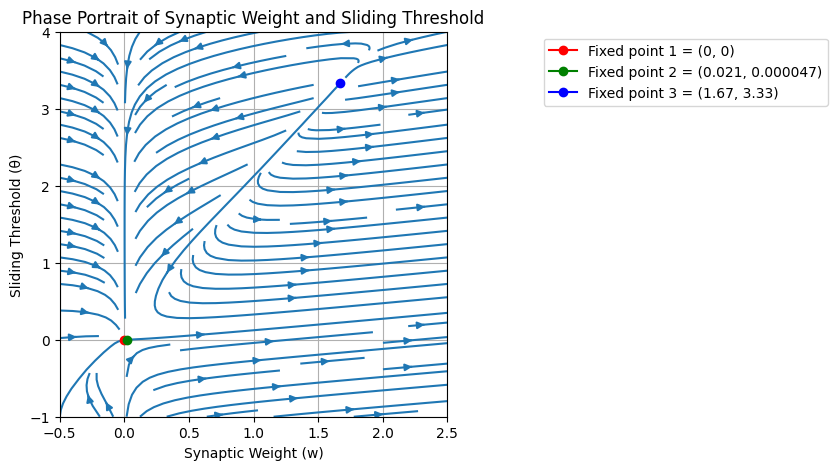

In [36]:

bcm_phase_portrait(
    w_min=-.5, w_max=2.5, theta_min=-1, theta_max=4,
    f=2.0, beta=1.0, lambda_=1.0, alpha=0.3, epsilon=0.05,
    tau_w=1.0, tau_theta=1.0, grid_size=30
)
